# Task 3: Covariance Propagation (25 points)

For this task, we will model an omni-directional robotic platform, i.e., a holonomic platform moving as a free
point without restrictions.


The propagation model is the following:
$$
\left[\begin{array}{l}
x \\
y
\end{array}\right]_{t}=\left[\begin{array}{ll}
1 & 0 \\
0 & 1
\end{array}\right]\left[\begin{array}{l}
x \\
y
\end{array}\right]_{t-1}+\left[\begin{array}{cc}
\Delta t & 0 \\
0 & \Delta t
\end{array}\right]\left[\begin{array}{l}
v_{x} \\
v_{y}
\end{array}\right]_{t}+\left[\begin{array}{l}
\eta_{x} \\
\eta_{y}
\end{array}\right]_{t}
$$

where the controls $u=\left[v_x, v_y\right]^{\top}$ are the velocities which are commanded to the robot. Unfortunately, there exists some uncertainty on command execution 

$$
\left[\begin{array}{l}
\eta_{x} \\
\eta_{y}
\end{array}\right]_{t} \sim \mathcal{N}\left(\left[\begin{array}{l}
0 \\
0
\end{array}\right],\left[\begin{array}{cc}
0.1 & 0 \\
0 & 0.1
\end{array}\right]\right)
$$

We will consider a time step of $∆t = 0.5$.

In [57]:
import numpy as np

from scipy.stats import norm
from scipy.linalg import cholesky
from scipy.stats import multivariate_normal


import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [80]:
def plot2dcov(mean, cov, color, label, k=1, n_points=60):

    Cholesky = cholesky(cov, lower=True)

    angles = np.linspace(0, 2 * np.pi, n_points)
    x_old = k * np.cos(angles)
    y_old = k * np.sin(angles)

    coords = np.stack((x_old, y_old), 1)
    contour = coords @ Cholesky.T + mean.reshape(1, 2) 

    plt.plot(contour[:, 0], contour[:, 1], color=color, label=label)
    plt.xlabel('x_1', size=14)
    plt.ylabel('x_2', size=14)

## A. (5 pts) 
Write the equations corresponding to the mean and covariance after a single propagation of the
holonomic platform. How can we use this result iteratively?

$$
\bar{\mu}_{t}=A_{t} \mu_{t-1}+B_{t} u_{t}
$$
$$\bar{\Sigma}_{t}=A_{t} \cdot \Sigma_{t-1} \cdot A_{t}^{T}+R$$

## B. (5 pts) 
Draw the propagation state PDF (1-sigma iso-contour) for times indexes $t = 0, . . . , 5$ and the control sequence $u_t = [3, 0]^{\top}$ for all times $t$. The PDF for the initial state is

$$
\left[\begin{array}{l}
x \\
y
\end{array}\right]_{0} \sim \mathcal{N}\left(\left[\begin{array}{l}
0 \\
0
\end{array}\right],\left[\begin{array}{cc}
0.1 & 0 \\
0 & 0.1
\end{array}\right]\right)
$$

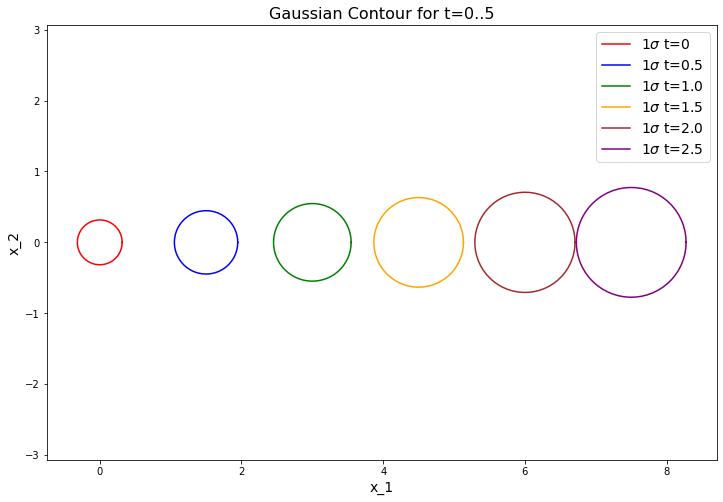

In [81]:
A = np.eye(2)
dt = 0.5
B = dt * np.eye(2)
u = np.array([3, 0])

# time = 0
mean_0 = np.array([0, 0])
cov_0 = np.array([[0.1, 0], [0, 0.1]])

eta_mean = np.array([0, 0])
eta_cov = np.array([[0.1, 0], [0, 0.1]])

# plot the initial state
plt.figure(figsize=(12,8))
plt.title(r'Gaussian Contour for t=0..5', size=16)

plot2dcov(mean_0, cov_0, color='r', label=f'{1}$\sigma$ t={0}')

cmap = ['b', 'g', 'orange', 'brown', 'purple']
for t in range(1, 6):
    mean_0 = A.dot(mean_0) + B @ u
    cov_0 = A @ cov_0 @ A.T + eta_cov
    plot2dcov(mean_0, cov_0, color=cmap[t-1], label=f'{1}$\sigma$ t={t*dt}')

plt.axes().set_aspect('equal', 'datalim')
plt.legend(prop={'size': 14})

plt.show()

## C. (5 pts) 
Somehow, the platform is malfunctioning; thus, it is moving strangely and its propagation model has changed

$$
\left[\begin{array}{l}
x \\
y
\end{array}\right]_{t}=\left[\begin{array}{ll}
1 & 0.3 \\
0 & 1
\end{array}\right]\left[\begin{array}{l}
x \\
y
\end{array}\right]_{t-1}+\left[\begin{array}{cc}
\Delta t & 0 \\
0 & \Delta t
\end{array}\right]\left[\begin{array}{l}
v_{x} \\
v_{y}
\end{array}\right]_{t}+\left[\begin{array}{l}
\eta_{x} \\
\eta_{y}
\end{array}\right]_{t}
$$

All the other parameters and controls are the same. 


Draw the propagation state PDF (1-sigma iso-contour and 500 particles) for times indexes $t = 0, . . . , 5$

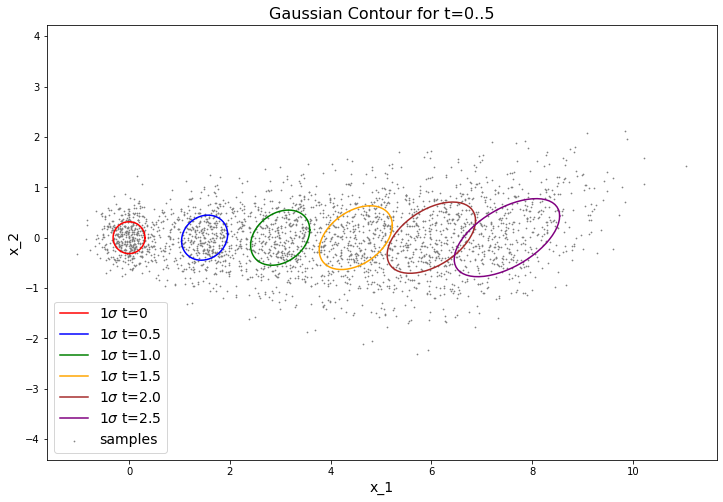

In [82]:
A = np.array([[1, 0.3], [0, 1]])
dt = 0.5
B = dt * np.eye(2)
u = np.array([3, 0])

# time = 0
mean_0 = np.array([0, 0])
cov_0 = np.array([[0.1, 0], [0, 0.1]])

size = 500
sample = multivariate_normal(mean=mean_0, cov=cov_0).rvs(size=size, random_state=42)


eta_mean = np.array([0, 0])
eta_cov = np.array([[0.1, 0], [0, 0.1]])

# plot the initial state
plt.figure(figsize=(12,8))
plt.title(r'Gaussian Contour for t=0..5', size=16)

plot2dcov(mean_0, cov_0, color='r', label=f'{1}$\sigma$ t={0}')
plt.scatter(sample[:, 0], sample[:, 1], s=0.5, c='gray', marker='o', label='samples')

cmap = ['b', 'g', 'orange', 'brown', 'purple']
for t in range(1, 6):
    mean_0 = A.dot(mean_0) + B @ u
    cov_0 = A @ cov_0 @ A.T + eta_cov
    sample = multivariate_normal(mean=mean_0, cov=cov_0).rvs(size=size, random_state=42)
    plot2dcov(mean_0, cov_0, color=cmap[t-1], label=f'{1}$\sigma$ t={t*dt}')
    plt.scatter(sample[:, 0], sample[:, 1], s=0.5, c='gray', marker='o')

plt.axes().set_aspect('equal', 'datalim')
plt.legend(prop={'size': 14})

plt.show()

## D. (5 pts)
$$
\left[\begin{array}{l}
x \\
y \\
\theta
\end{array}\right]_{t}=\left[\begin{array}{lll}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right]\left[\begin{array}{l}
x \\
y \\
\theta
\end{array}\right]_{t-1}+\left[\begin{array}{cc}
\cos (\theta) \Delta t & 0 \\
\sin (\theta) \Delta t & 0 \\
0 & \Delta t
\end{array}\right]\left[\begin{array}{c}
v \\
w
\end{array}\right]_{t}+\left[\begin{array}{l}
\eta_{x} \\
\eta_{y} \\
\eta_{\theta}
\end{array}\right]_{t} \text {, being }\left[\begin{array}{c}
\eta_{x} \\
\eta_{y} \\
\eta_{\theta}
\end{array}\right]_{t} \sim \mathcal{N}\left(\left[\begin{array}{c}
0 \\
0 \\
0
\end{array}\right],\left[\begin{array}{ccc}
0.2 & 0 & 0 \\
0 & 0.2 & 0 \\
0 & 0 & 0.1
\end{array}\right]\right)
$$
and the PDF for the initial state
$$
\left[\begin{array}{l}
x \\
y \\
\theta
\end{array}\right]_{0} \sim \mathcal{N}\left(\left[\begin{array}{l}
0 \\
0 \\
0
\end{array}\right],\left[\begin{array}{ccc}
0.1 & 0 & 0 \\
0 & 0.1 & 0 \\
0 & 0 & 0.5
\end{array}\right]\right)
$$
Propagate, as explained in class (linearize plus covariance propagation), for five time intervals, using the
control $u_t = [3, 1.5]^{\top}$ showing the propagated Gaussian by plotting the 1-sigma iso-contour. Angles are in
radians. Hint: you can marginalize out $θ$ and plot the corresponding $Σ_{xy}$ as explained in class.

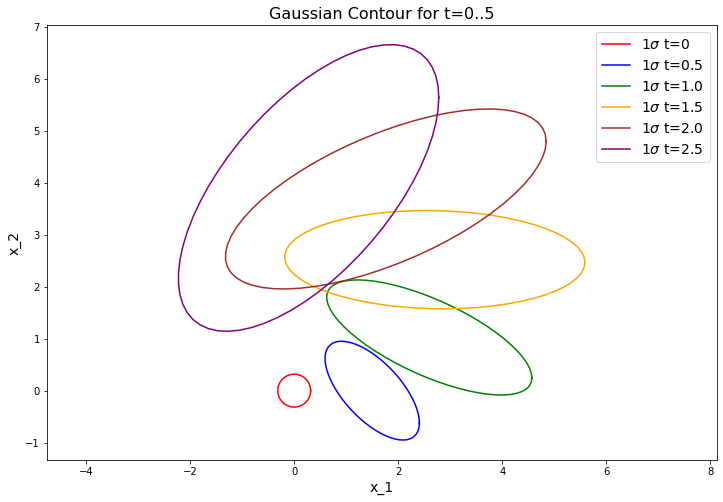

In [88]:
cov = np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.5]])

A = np.eye(3)
u = np.array([3, 1.5])
mean = np.array([0, 0, 0])

eta_mean = np.array([0, 0, 0])
eta_cov = np.array([[0.2, 0, 0], [0, 0.2, 0], [0, 0, 0.1]])


# plot the initial state
plt.figure(figsize=(12,8))
plt.title(r'Gaussian Contour for t=0..5', size=16)

plot2dcov(mean[:2], cov[:2, :2], color='r', label=f'{1}$\sigma$ t={0}')

cmap = ['b', 'g', 'orange', 'brown', 'purple']
for t in range(1, 6):
    B = np.array([[np.cos(mean[2]) * dt, 0], [np.sin(mean[2]) * dt, 0], [0, dt]])
    mean = A @ mean + B @ u
    G = np.array([[1, 0, -np.sin(mean[2]) * u[0] * dt], [0, 1, np.cos(mean[2]) * u[0] * dt], [0, 0, 1]])
    cov = G @ cov @ G.T + eta_cov
    plot2dcov(mean[:2], cov[:2, :2], color=cmap[t-1], label=f'{1}$\sigma$ t={t*dt}')

plt.axes().set_aspect('equal', 'datalim')
plt.legend(prop={'size': 14})

plt.show()

## E. (5 pts) 
Repeat the same experiment as above, using the same control input $u_t$ and now initial state estimate, considering that noise is expressed in the action space instead of state space:

$$
\left[\begin{array}{l}
x \\
y \\
\theta
\end{array}\right]_{t}=\left[\begin{array}{lll}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right]\left[\begin{array}{l}
x \\
y \\
\theta
\end{array}\right]_{t-1}+\left[\begin{array}{cc}
\cos (\theta) \Delta t & 0 \\
\sin (\theta) \Delta t & 0 \\
0 & \Delta t
\end{array}\right]\left[\begin{array}{c}
v+\eta_{v} \\
w+\eta_{w}
\end{array}\right]_{t}, \text { being }\left[\begin{array}{l}
\eta_{v} \\
\eta_{w}
\end{array}\right]_{t} \sim \mathcal{N}\left(\left[\begin{array}{l}
0 \\
0
\end{array}\right],\left[\begin{array}{cc}
2 & 0 \\
0 & 0.1
\end{array}\right]\right)
$$

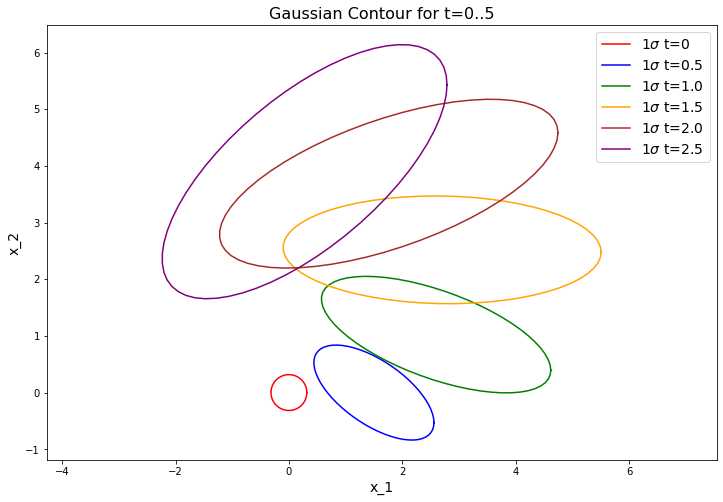

In [87]:
cov = np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.5]])

A = np.eye(3)
u = np.array([3, 1.5])
mean = np.array([0, 0, 0])

eta_mean = np.array([0, 0])
eta_cov = np.array([[2, 0], [0, 0.1]])


# plot the initial state
plt.figure(figsize=(12,8))
plt.title(r'Gaussian Contour for t=0..5', size=16)

plot2dcov(mean[:2], cov[:2, :2], color='r', label=f'{1}$\sigma$ t={0}')

cmap = ['b', 'g', 'orange', 'brown', 'purple']
for t in range(1, 6):
    B = np.array([[np.cos(mean[2]) * dt, 0], [np.sin(mean[2]) * dt, 0], [0, dt]])
    mean = A @ mean + B @ (u + eta_mean)
    G = np.array([[1, 0, -np.sin(mean[2]) * u[0] * dt], [0, 1, np.cos(mean[2]) * u[0] * dt], [0, 0, 1]])
    cov = G @ cov @ G.T + B @ eta_cov @ B.T
    plot2dcov(mean[:2], cov[:2, :2], color=cmap[t-1], label=f'{1}$\sigma$ t={t*dt}')

plt.axes().set_aspect('equal', 'datalim')
plt.legend(prop={'size': 14})

plt.show()

Both cases in E. and in D. look similar. In E. variance seems less than in D.